# <center> ACM India and RBCDSAI Joint Summer School on DS/AI/ML
## <center> Hands-on Tutorial Day-10
## <center> Introduction to neural networks

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [19]:
train_df = pd.read_csv('Train_Dataset1.csv',header=None)
X_train, y_train = train_df[0].to_numpy().reshape(1,-1),train_df[1].to_numpy().reshape(1,-1)
test_df = pd.read_csv('Test_Dataset1.csv',header=None)
X_test, y_test = test_df[0].to_numpy().reshape(1,-1),test_df[1].to_numpy().reshape(1,-1)

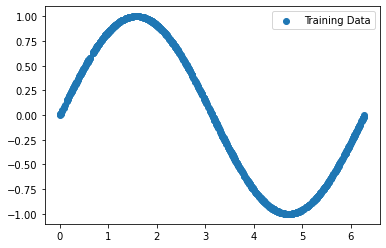

In [20]:
plt.scatter(X_train,y_train,label='Training Data')
plt.legend()

In [27]:
class ANN:
    def __init__(self, X, y, hidden_units,learning_rate,epochs):#Give training data, number of neurons,learning rate and epochs
        self.X = X
        self.y = y
        self.hidden_units = hidden_units
        self.input_features = X.shape[0]  #Get shape from X
        self.output_units = y.shape[0]  #Get shape from y
        self.lr = learning_rate #Get learning rate from init
        self.epochs = epochs  #Get epochs from init

    def init_weights(self):#Initialize weights from a random normal distribution (Bias only for hidden layer)
        self.W1 = np.random.normal(size = (self.hidden_units, self.input_features)) #Shapes of weights and biases
        self.b1 = np.ones((self.hidden_units, 1))
        self.W2 = np.random.normal(size = (self.output_units, self.hidden_units))
    
    def sigmoid(self,X):#sigmoid activation 
        return 1/(1+np.exp(-X))

    def mse_loss(self,y_hat,y):#Calculate mean squared error loss
        errors = (y_hat-y)**2
        return np.mean(errors)

    def d_sigmoid(self,X):#Derivative for sigmoid activation
        #func = np.poly1d(1/(1+np.exp(-X)))
        return (self.sigmoid(X)*(1-self.sigmoid(X)))
           
    def forward(self,X):#Forward propagation for single layer ANN with sigmoid activation applied only for hidden layer
        self.Z1 = self.W1@X+self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = self.W2@self.A1
        return self.Z2
        
    def backward(self):#Backward propagation using Mean Squared Error loss as objective function as it is a regression problem
        d_E_y = 2*(self.Z2-self.y)/self.y.size
        d_E_W2 = d_E_y@self.A1.T
        d_E_A1 = self.W2.T@d_E_y
        d_E_Z1 = d_E_A1*self.d_sigmoid(self.Z1)
        d_E_W1 = d_E_Z1@self.X.T
        d_E_b1 = d_E_Z1@np.ones((d_E_A1.shape[1], 1))
        self.W1 -= self.lr*d_E_W1 #Update weights based on learning rate and gradient
        self.W2 -= self.lr*d_E_W2
        self.b1 -= self.lr*d_E_b1
    
    def train(self,X_test,y_test):#Train the network for n number of epochs and calculate train and test loss
        self.init_weights()
        train_losses = []
        test_losses = []
        for i in range(self.epochs):
            train_preds = self.forward(self.X)  #Forward propagation for training data
            self.backward() #Backward propagation for training data
            test_preds = self.forward(X_test) #Only forward propagation for test to get predictions
            train_loss = self.mse_loss(train_preds, self.y)
            test_loss = self.mse_loss(test_preds, y_test)
            train_losses.append(train_loss)
            test_losses.append(test_loss)
            print('Epoch: %s, Train Loss: %s, Test Loss: %s' % (i,train_loss,test_loss))
        return train_losses,test_losses

In [ ]:
ann = ANN(X_train,y_train,2,0.9,1000)
train_losses,test_losses = ann.train(X_test,y_test)

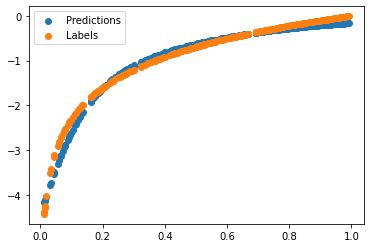

In [41]:
test_predictions = ann.forward(X_test)
plt.scatter(X_test,test_predictions,label='Predictions')
plt.scatter(X_test,y_test,label = 'Labels')
plt.legend()

In [37]:
print('Average Train loss: %s, Average Test Loss: %s' % (np.mean(train_losses),np.mean(test_losses)))

Average Train loss: 0.10392647699823764, Average Test Loss: 0.03600501815739307


In [31]:
#Dataset 2
train_df = pd.read_csv('Train_Dataset2.csv',header=None)
X_train, y_train = train_df[0].to_numpy().reshape(1,-1),train_df[1].to_numpy().reshape(1,-1)
test_df = pd.read_csv('Test_Dataset2.csv',header=None)
X_test, y_test = test_df[0].to_numpy().reshape(1,-1),test_df[1].to_numpy().reshape(1,-1)

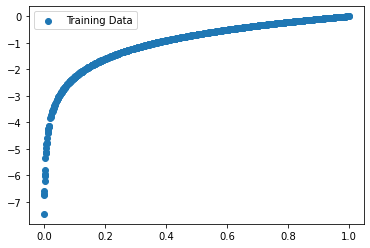

In [42]:
plt.scatter(X_train,y_train,label='Training Data')
plt.legend()

In [ ]:
#Train for dataset 2
ann = ANN(X_train,y_train,2,0.2,2000)
train_losses,test_losses = ann.train(X_test,y_test)

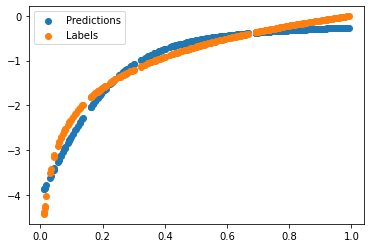

In [54]:
test_predictions = ann.forward(X_test)  #Forward propagation
plt.scatter(X_test,test_predictions,label='Predictions')
plt.scatter(X_test,y_test,label = 'Labels')
plt.legend()

In [55]:
print('Average Train loss: %s, Average Test Loss: %s' % (np.mean(train_losses),np.mean(test_losses)))

Average Train loss: 0.13433869963408873, Average Test Loss: 0.04901473903811341


# <center> Introduction to Pytorch

In [56]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [57]:
#All operations in pytorch work on tensors
X_train_tensor = torch.from_numpy(X_train).T.float()
y_train_tensor = torch.from_numpy(y_train).T.float()
X_test_tensor = torch.from_numpy(X_test).T.float()
y_test_tensor = torch.from_numpy(y_test).T.float()

In [58]:
class LinearModel(nn.Module):
    def __init__(self, hidden_units, output_units):
        super(LinearModel, self).__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(1, hidden_units), #Hidden layer
            nn.Sigmoid(), #Activation
            nn.Linear(hidden_units, output_units) #Output layer
        )

    def forward(self, x):
        logits = self.linear_stack(x)
        return logits

In [61]:
#Define model
model = LinearModel(2, 1)

In [62]:
#Do forward propagation
predictions = model(X_train_tensor)
predictions.shape

torch.Size([1000, 1])

In [63]:
#Define loss function
loss_fn = nn.MSELoss(reduction='mean')
print('Loss after forward propagation %s' % float(loss_fn(predictions,y_train_tensor)))

Loss after forward propagation 1.4591022729873657


In [64]:
#Dataloader for train set
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = 10, shuffle=True)

In [65]:
#Dataloader for test set
test_dataset = TensorDataset(X_test_tensor,y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = 10, shuffle=True)

In [67]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X_batch, y_batch = X, y

        # Compute prediction error
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X_batch)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]") 

In [93]:
#Define gradient descent algorithm
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#Train the model
epochs = 10
for i in range(epochs):
  print(f"Epoch {i+1}\n-------------------------------")
  train(train_loader,model,loss_fn,optimizer)

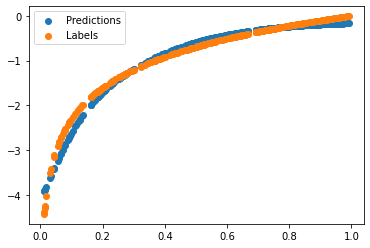

In [100]:
test_predictions = model(X_test_tensor).T.detach().numpy()
plt.scatter(X_test,test_predictions,label='Predictions')
plt.scatter(X_test,y_test,label = 'Labels')
plt.legend()

In [101]:
print('Average test loss is %s' % float(loss_fn(model(X_test_tensor),y_test_tensor)))

Average test loss is 0.017466524615883827
